11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
235/235 [==============================] - 9s 8ms/step - loss: 0.2137 - val_loss: 0.1332
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1170 - val_loss: 0.1025
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0962 - val_loss: 0.0889
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0858 - val_loss: 0.0816
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0798 - val_loss: 0.0770
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0761 - val_loss: 0.0741
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0737 - val_loss: 0.0722
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0721 - val_loss: 0.0711
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0709 - val_loss: 0.0701
Epoch 10/10
313/313 [==============

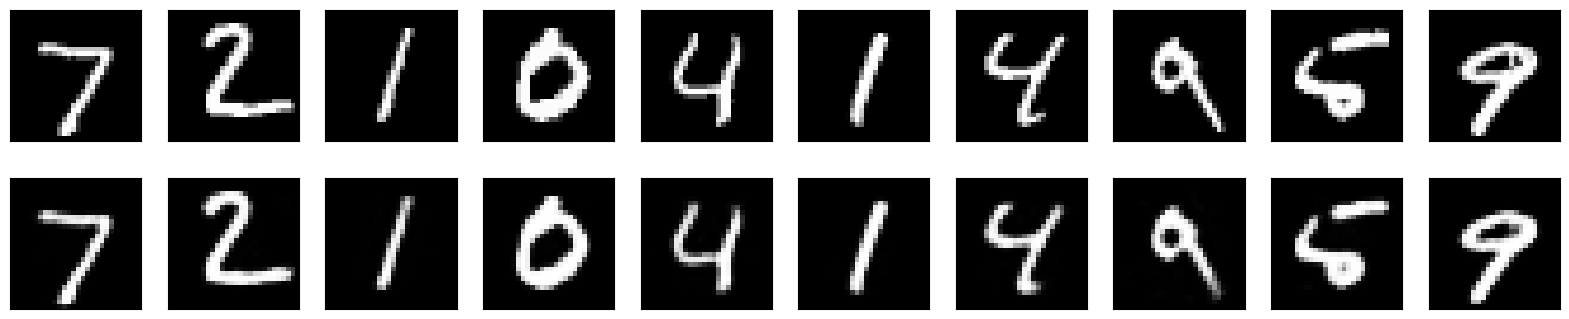

In [1]:
#Autoencoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the input images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the input shape
input_shape = x_train.shape[1:]

# Define the autoencoder architecture
input_img = Input(shape=input_shape)
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Use the trained autoencoder for encoding and decoding
encoded_imgs = autoencoder.predict(x_test)

# Display some original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


(None, 2)
Epoch 1/10
(None, 2)
(None, 2)
469/469 [==============================] - 5s 5ms/step - loss: 203.2913 - val_loss: 176.3490
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 171.6477 - val_loss: 168.2984
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 167.0418 - val_loss: 165.9510
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 164.9592 - val_loss: 164.2959
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 163.3679 - val_loss: 163.0275
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 162.1171 - val_loss: 161.7605
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 161.0156 - val_loss: 160.7597
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 159.9791 - val_loss: 160.0765
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 158.9748 - val_loss: 158.8754
Epoch 10/10
469/469 [=============

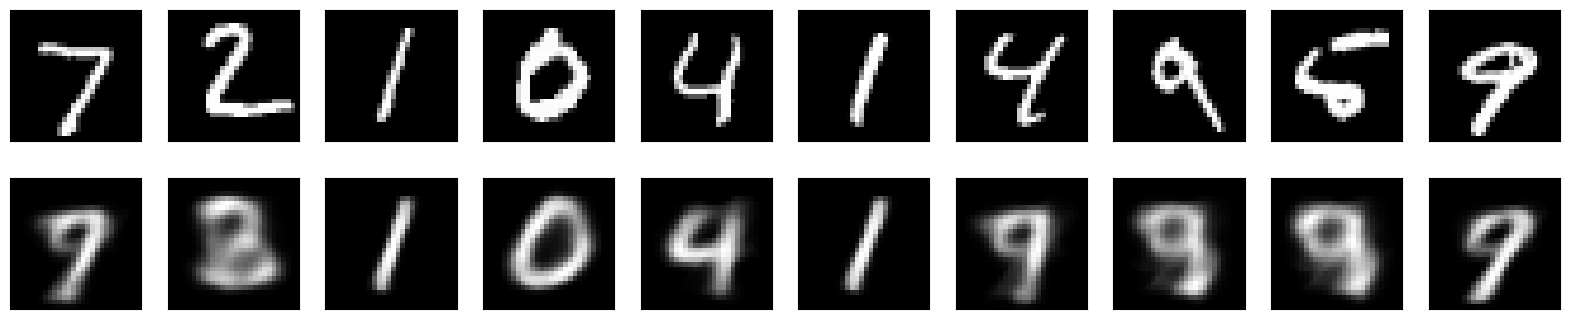

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the input images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the input shape
input_shape = x_train.shape[1:]

# Define the dimensions of the latent space
latent_dim = 2

# Define the encoder architecture
input_img = Input(shape=input_shape)
encoded = Dense(256, activation='relu')(input_img)
z_mean = Dense(latent_dim)(encoded)
z_log_var = Dense(latent_dim)(encoded)

# Define the sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    print(epsilon.shape)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Perform the sampling to get the latent space
z = Lambda(sampling)([z_mean, z_log_var])

# Define the decoder architecture
decoded = Dense(256, activation='relu')(z)
output_img = Dense(np.prod(input_shape), activation='sigmoid')(decoded)

# Create the variational autoencoder model
vae = Model(input_img, output_img)

# Define the custom loss function
def vae_loss(input_img, output_img):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(input_img, output_img) * np.prod(input_shape)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss

# Compile the variational autoencoder model
vae.add_loss(vae_loss(input_img, output_img))
vae.compile(optimizer='adam')

# Train the variational autoencoder
vae.fit(x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, None))

# Use the trained variational autoencoder for encoding and decoding
encoded_imgs = vae.predict(x_test)

# Display some original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
#GAN
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.optimizers import Adam
# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Normalize and reshape the input images
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# Define the generator architecture
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_dim=100))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Reshape((7, 7, 128)))
generator.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid'))

# Define the discriminator architecture
discriminator = Sequential()
discriminator.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Freeze the discriminator during the generator training
discriminator.trainable = False

# Define the GAN architecture by combining the generator and discriminator
gan_input = tf.keras.Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Define a function to generate fake images
def generate_fake_images(num_samples):
    noise = np.random.normal(0, 1, size=(num_samples, 100))
    fake_images = generator.predict(noise)
    return fake_images

# Define a function to train the GAN
def train_gan(num_epochs, batch_size):
    num_batches = x_train.shape[0] // batch_size

    for epoch in range(num_epochs):
        for batch in range(num_batches):
            # Train the discriminator on real images
            real_images = x_train[batch * batch_size : (batch + 1) * batch_size]
            real_labels = np.ones((batch_size, 1))
            discriminator.train_on_batch(real_images, real_labels)

            # Train the discriminator on fake images
            fake_images = generate_fake_images(batch_size)
            fake_labels = np.zeros((batch_size, 1))
            discriminator.train_on_batch(fake_images, fake_labels)

            # Train the generator via GAN
            noise = np.random.normal(0, 1, size=(batch_size, 100))
            gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print the current epoch
        print("Epoch {}/{}".format(epoch + 1, num_epochs))

# Train the GAN
train_gan(num_epochs=50, batch_size=128)






Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
4/4 [==============================] - 0s 6ms/step
Epoch 40/50
4/4 [==============================] - 0s 3ms/step
Epoch 41/50
4/4 [==============================] - 0s 3ms/step
Epoch 42/50
4/4 [==============================] - 0s 4ms/step
Epoch 43/50
4/4 [==============================] - 0s 6ms/step
Epoch 44/50
4/4 [==============================] - 0s 4ms/step
Epoch 45/50
4/4 [==============================] - 0s 6ms/step
Epoch 46/50
4/4 [==============================] - 0s 6ms/step
Epoch 47/50
4/4 [==============================] - 0s 7ms/step
Epoch 48/50
4/4 [==============================] - 0s 5ms/step
Epoch 49/50
4/4 [==============================] - 0s 5ms/step
Epoch 50/50


1/1 [==============================] - 0s 111ms/step


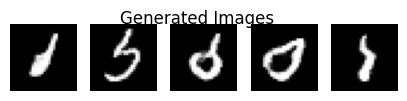

In [ ]:
import matplotlib.pyplot as plt
def sample_images(generator, num_samples):
    noise = np.random.normal(0, 1, size=(num_samples, 100))
    generated_images = generator.predict(noise)
    
    # Rescale generated images to [0, 1]
    generated_images = 0.5 * generated_images + 0.5
    
    # Plot the generated images
    fig, axs = plt.subplots(1, num_samples, figsize=(num_samples, 1))
    fig.suptitle('Generated Images')
    for i in range(num_samples):
        axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
        axs[i].axis('off')
    plt.show()
sample_images(generator, num_samples=5)


## Quiz 2

In [47]:
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0 / 100.0

V = -10.0
V_0 = -60.0
tau = 2.0

time_values = []
voltage_values = []

while t < 50.0:
  time_values.append(t)
  voltage_values.append(V)

  dV_dt = -(V - V_0) / tau
  V += dV_dt * dt
  t += dt

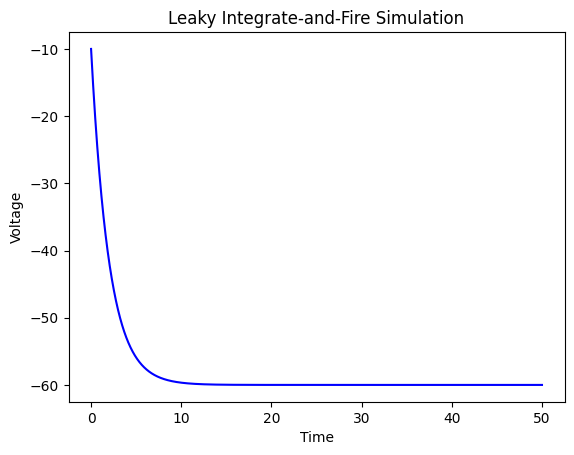

In [48]:
plt.plot(time_values, voltage_values, color="blue")
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Leaky Integrate-and-Fire Simulation')
plt.show()

## Quiz 3

In [45]:
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0 / 100.0

V = -50.0
V_0 = -60.0
tau = 2.0

V_thres = 20.0

time_values = []
voltage_values = []
spike_times = []

while t < 70.0:
  time_values.append(t)
  voltage_values.append(V)

  dV_dt = -(V - V_0) / tau

  if t > 20.0 and t < 45.0:
    dV_dt += 50.0

  V += dV_dt * dt

  if V >= V_thres:
      V = V_0
      spike_times.append(t)
  t += dt


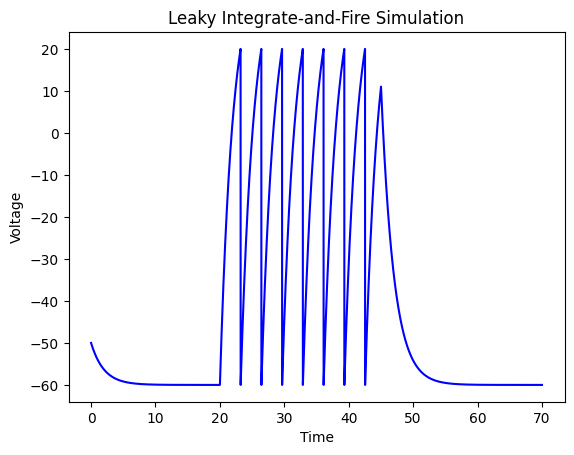

In [46]:

plt.plot(time_values, voltage_values, color="blue")
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Leaky Integrate-and-Fire Simulation')
plt.show()